# Notes on this Notebook
- Most of the time was taken to narrow down this HUGE dataset into something usable
- You can find the plot code at the bottom
- I just began coding a few months back, and I'm very excited to be able to do something cool with this new skill!

In [257]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [258]:
data = pd.read_csv('../Week5-Visualization\World_Development_Indicators\indicators.csv')

In [259]:
#Recall form of the data
print(data.shape)
print(data.head())

(5656458, 6)
  CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06  


In [260]:
#Build a dataframe for the only Senegal and Nigeria
country_filter = ['Senegal', 'Nigeria']
country_mask = data['CountryName'].isin(country_filter)
df_SN = data[country_mask]
print(df_SN.shape)
print(df_SN.head())

(65371, 6)
      CountryName CountryCode  \
16640     Nigeria         NGA   
16641     Nigeria         NGA   
16642     Nigeria         NGA   
16643     Nigeria         NGA   
16644     Nigeria         NGA   

                                           IndicatorName   IndicatorCode  \
16640  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
16641  Age dependency ratio (% of working-age populat...     SP.POP.DPND   
16642  Age dependency ratio, old (% of working-age po...  SP.POP.DPND.OL   
16643  Age dependency ratio, young (% of working-age ...  SP.POP.DPND.YG   
16644               Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN   

       Year       Value  
16640  1960  163.956000  
16641  1960   79.979330  
16642  1960    5.074448  
16643  1960   74.904882  
16644  1960   46.260000  


In [261]:
#Find indicators for education contained in data frame
indicators = df_SN['IndicatorName'].unique().tolist()
for indicator in indicators:
    if 'education' in indicator:
        print(indicator)
#That is too many indicators to chose from! 

Adjusted savings: education expenditure (% of GNI)
Adjusted savings: education expenditure (current US$)
Enrolment in primary education, both sexes (number)
Enrolment in secondary education, both sexes (number)
Official entrance age to lower secondary education (years)
Official entrance age to primary education (years)
Percentage of enrolment in primary education in private institutions (%)
Percentage of students in primary education who are female (%)
Percentage of students in secondary education who are female (%)
Percentage of students in secondary general education who are female (%)
Percentage of students in secondary vocational education who are female (%)
Percentage of teachers in primary education who are female (%)
Percentage of teachers in secondary education who are female (%)
Pupil-teacher ratio in primary education (headcount basis)
Pupil-teacher ratio in secondary education (headcount basis)
Teachers in primary education, both sexes (number)
Teachers in secondary educatio

In [262]:
#Let's zoom in on secondary education
for indicator in indicators:
    if 'primary education' in indicator:
        print(indicator)
#This is much more reasonable

Enrolment in primary education, both sexes (number)
Official entrance age to primary education (years)
Percentage of enrolment in primary education in private institutions (%)
Percentage of students in primary education who are female (%)
Percentage of teachers in primary education who are female (%)
Pupil-teacher ratio in primary education (headcount basis)
Teachers in primary education, both sexes (number)
Theoretical duration of primary education (years)
Gross intake ratio to Grade 1 of primary education, both sexes (%)
Gross intake ratio to Grade 1 of primary education, female (%)
Gross intake ratio to Grade 1 of primary education, male (%)
Percentage of repeaters in primary education, all grades, both sexes (%)
Percentage of repeaters in primary education, all grades, female (%)
Percentage of repeaters in primary education, all grades, male (%)
Survival rate to Grade 5 of primary education, both sexes (%)
Survival rate to Grade 5 of primary education, female (%)
Survival rate to G

In [263]:
#Let's pick one indicator that look like it could answer our question about education
edu_mask = df_SN['IndicatorName'] == 'Labor force with secondary education (% of total)'
print(df_SN[edu_mask].head())
print(df_SN[edu_mask].shape)

        CountryName CountryCode  \
2580974     Nigeria         NGA   

                                             IndicatorName   IndicatorCode  \
2580974  Labor force with secondary education (% of total)  SL.TLF.SECO.ZS   

         Year      Value  
2580974  1995  40.200001  
(1, 6)


In [264]:
#Well, it doesn't look like this data is complete at all
#Let's try another category
edu_mask = df_SN['IndicatorName'] == 'Enrolment in secondary education, both sexes (number)'
secondary_ed_SN = df_SN[edu_mask]
print(secondary_ed_SN.shape)

(57, 6)


In [265]:
#To make data frame with years that have data for both Senegal and Nigeria
df_N_mask = secondary_ed_SN['CountryName'] == 'Nigeria'
df_N = secondary_ed_SN[df_N_mask]
df_S_mask = secondary_ed_SN['CountryName'] == 'Senegal'
df_S = secondary_ed_SN[df_S_mask]
ed_SN = pd.merge(df_N, df_S, on = 'Year')
ed_SN

,CountryName_x,CountryCode_x,IndicatorName_x,IndicatorCode_x,Year,Value_x,CountryName_y,CountryCode_y,IndicatorName_y,IndicatorCode_y,Value_y
0,Nigeria,NGA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1971,395575.0,Senegal,SEN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,59401.0
1,Nigeria,NGA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1972,451042.0,Senegal,SEN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,65573.0
2,Nigeria,NGA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1978,904931.0,Senegal,SEN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,85974.0
3,Nigeria,NGA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1979,1131112.0,Senegal,SEN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,83711.0
4,Nigeria,NGA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1980,1451242.0,Senegal,SEN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,87755.0
5,Nigeria,NGA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1981,1864713.0,Senegal,SEN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,95604.0
6,Nigeria,NGA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1982,2345604.0,Senegal,SEN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,103821.0
7,Nigeria,NGA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1983,2880280.0,Senegal,SEN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,109937.0
8,Nigeria,NGA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1984,3393186.0,Senegal,SEN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,113561.0
9,Nigeria,NGA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1985,3561207.0,Senegal,SEN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,121496.0


In [266]:
#clean df
ed_SN = ed_SN[['Year', 'IndicatorName_x', 'CountryCode_x', 'Value_x', 'CountryCode_y', 'Value_y']]

In [267]:
ed_SN.head()
#Looks clean!

,Year,IndicatorName_x,CountryCode_x,Value_x,CountryCode_y,Value_y
0,1971,"Enrolment in secondary education, both sexes (...",NGA,395575.0,SEN,59401.0
1,1972,"Enrolment in secondary education, both sexes (...",NGA,451042.0,SEN,65573.0
2,1978,"Enrolment in secondary education, both sexes (...",NGA,904931.0,SEN,85974.0
3,1979,"Enrolment in secondary education, both sexes (...",NGA,1131112.0,SEN,83711.0
4,1980,"Enrolment in secondary education, both sexes (...",NGA,1451242.0,SEN,87755.0


In [268]:
#Now I realize that the values for Nigeria and Senegal are both counts of the number of students
#I must change them to be a percentage of the population
for indicator in indicators:
    if "Population" in indicator:
        print(indicator)

Population ages 65 and above (% of total)
Population growth (annual %)
Population in largest city
Population in the largest city (% of urban population)
Population in urban agglomerations of more than 1 million
Population in urban agglomerations of more than 1 million (% of total population)
Population, ages 0-14 (% of total)
Population, ages 15-64 (% of total)
Population, female (% of total)
Population, total
Population density (people per sq. km of land area)
Population living in areas where elevation is below 5 meters (% of total population)


In [269]:
#Let's pull out 'Population, total' for Senegal and Nigeria
population_mask = data['IndicatorName'] == 'Population, total'
df_pop = data[population_mask]
Nigeria_mask = df_pop['CountryName'] == 'Nigeria'
Senegal_mask = df_pop['CountryName'] == 'Senegal'
df_pop_N = df_pop[Nigeria_mask]
df_pop_S = df_pop[Senegal_mask]
pop_SN = pd.merge(df_pop_N, df_pop_S, on = 'Year')
pop_SN = pop_SN[['Year', 'CountryCode_x', 'Value_x', 'CountryCode_y', 'Value_y']]
pop_SN.head()

,Year,CountryCode_x,Value_x,CountryCode_y,Value_y
0,1960,NGA,45211614.0,SEN,3177560.0
1,1961,NGA,46144154.0,SEN,3265558.0
2,1962,NGA,47117859.0,SEN,3356421.0
3,1963,NGA,48128460.0,SEN,3450418.0
4,1964,NGA,49169819.0,SEN,3547939.0


In [270]:
pop_SN.columns = ['Year', 'Country_x', 'Pop_x', 'Country_y', 'Pop_y']
pop_SN.head()

,Year,Country_x,Pop_x,Country_y,Pop_y
0,1960,NGA,45211614.0,SEN,3177560.0
1,1961,NGA,46144154.0,SEN,3265558.0
2,1962,NGA,47117859.0,SEN,3356421.0
3,1963,NGA,48128460.0,SEN,3450418.0
4,1964,NGA,49169819.0,SEN,3547939.0


In [271]:
ed_SN = pd.merge(ed_SN, pop_SN, on = 'Year')
ed_SN

,Year,IndicatorName_x,CountryCode_x,Value_x,CountryCode_y,Value_y,Country_x,Pop_x,Country_y,Pop_y
0,1971,"Enrolment in secondary education, both sexes (...",NGA,395575.0,SEN,59401.0,NGA,57453734.0,SEN,4348499.0
1,1972,"Enrolment in secondary education, both sexes (...",NGA,451042.0,SEN,65573.0,NGA,58829319.0,SEN,4485342.0
2,1978,"Enrolment in secondary education, both sexes (...",NGA,904931.0,SEN,85974.0,NGA,69512233.0,SEN,5289445.0
3,1979,"Enrolment in secondary education, both sexes (...",NGA,1131112.0,SEN,83711.0,NGA,71619216.0,SEN,5424299.0
4,1980,"Enrolment in secondary education, both sexes (...",NGA,1451242.0,SEN,87755.0,NGA,73698096.0,SEN,5568651.0
5,1981,"Enrolment in secondary education, both sexes (...",NGA,1864713.0,SEN,95604.0,NGA,75729572.0,SEN,5723541.0
6,1982,"Enrolment in secondary education, both sexes (...",NGA,2345604.0,SEN,103821.0,NGA,77729802.0,SEN,5888261.0
7,1983,"Enrolment in secondary education, both sexes (...",NGA,2880280.0,SEN,109937.0,NGA,79729311.0,SEN,6062682.0
8,1984,"Enrolment in secondary education, both sexes (...",NGA,3393186.0,SEN,113561.0,NGA,81775215.0,SEN,6246140.0
9,1985,"Enrolment in secondary education, both sexes (...",NGA,3561207.0,SEN,121496.0,NGA,83901570.0,SEN,6438024.0


In [273]:
ed_SN = ed_SN[['Year', 'IndicatorName_x', 'CountryCode_x', 'Value_x', 'Pop_x', 'CountryCode_y', 'Value_y', 'Pop_y']]
ed_SN

,Year,IndicatorName_x,CountryCode_x,Value_x,Pop_x,CountryCode_y,Value_y,Pop_y
0,1971,"Enrolment in secondary education, both sexes (...",NGA,395575.0,57453734.0,SEN,59401.0,4348499.0
1,1972,"Enrolment in secondary education, both sexes (...",NGA,451042.0,58829319.0,SEN,65573.0,4485342.0
2,1978,"Enrolment in secondary education, both sexes (...",NGA,904931.0,69512233.0,SEN,85974.0,5289445.0
3,1979,"Enrolment in secondary education, both sexes (...",NGA,1131112.0,71619216.0,SEN,83711.0,5424299.0
4,1980,"Enrolment in secondary education, both sexes (...",NGA,1451242.0,73698096.0,SEN,87755.0,5568651.0
5,1981,"Enrolment in secondary education, both sexes (...",NGA,1864713.0,75729572.0,SEN,95604.0,5723541.0
6,1982,"Enrolment in secondary education, both sexes (...",NGA,2345604.0,77729802.0,SEN,103821.0,5888261.0
7,1983,"Enrolment in secondary education, both sexes (...",NGA,2880280.0,79729311.0,SEN,109937.0,6062682.0
8,1984,"Enrolment in secondary education, both sexes (...",NGA,3393186.0,81775215.0,SEN,113561.0,6246140.0
9,1985,"Enrolment in secondary education, both sexes (...",NGA,3561207.0,83901570.0,SEN,121496.0,6438024.0


In [276]:
#Convert to correct data types
for value in ed_SN['Value_x']:
    value = float(value)
for value in ed_SN['Value_y']:
    value = float(value)
for value in ed_SN['Pop_x']:
    value = float(value)
for value in ed_SN['Pop_y']:
    value = float(value)
ed_SN.head()

,Year,IndicatorName_x,CountryCode_x,Value_x,Pop_x,CountryCode_y,Value_y,Pop_y,IndicatorPerCaptia_x,IndicatorPerCaptia_y
0,1971,"Enrolment in secondary education, both sexes (...",NGA,395575.0,57453734.0,SEN,59401.0,4348499.0,0.006885,0.013660
1,1972,"Enrolment in secondary education, both sexes (...",NGA,451042.0,58829319.0,SEN,65573.0,4485342.0,0.007667,0.014619
2,1978,"Enrolment in secondary education, both sexes (...",NGA,904931.0,69512233.0,SEN,85974.0,5289445.0,0.013018,0.016254
3,1979,"Enrolment in secondary education, both sexes (...",NGA,1131112.0,71619216.0,SEN,83711.0,5424299.0,0.015793,0.015433
4,1980,"Enrolment in secondary education, both sexes (...",NGA,1451242.0,73698096.0,SEN,87755.0,5568651.0,0.019692,0.015759


In [277]:
#Get per capita estimate for Indicator
ed_SN['IndicatorPerCaptia_x'] = ed_SN['Value_x'] / ed_SN['Pop_x']
ed_SN['IndicatorPerCaptia_y'] = ed_SN['Value_y'] / ed_SN['Pop_y']
ed_SN.head()
#Ready for analysis!

,Year,IndicatorName_x,CountryCode_x,Value_x,Pop_x,CountryCode_y,Value_y,Pop_y,IndicatorPerCaptia_x,IndicatorPerCaptia_y
0,1971,"Enrolment in secondary education, both sexes (...",NGA,395575.0,57453734.0,SEN,59401.0,4348499.0,0.006885,0.013660
1,1972,"Enrolment in secondary education, both sexes (...",NGA,451042.0,58829319.0,SEN,65573.0,4485342.0,0.007667,0.014619
2,1978,"Enrolment in secondary education, both sexes (...",NGA,904931.0,69512233.0,SEN,85974.0,5289445.0,0.013018,0.016254
3,1979,"Enrolment in secondary education, both sexes (...",NGA,1131112.0,71619216.0,SEN,83711.0,5424299.0,0.015793,0.015433
4,1980,"Enrolment in secondary education, both sexes (...",NGA,1451242.0,73698096.0,SEN,87755.0,5568651.0,0.019692,0.015759


# Analysis
### We want two graphs
- Enrolment in Secondary Education per Captia Linegraph
- Senegal vs Nigeria Scatterplot

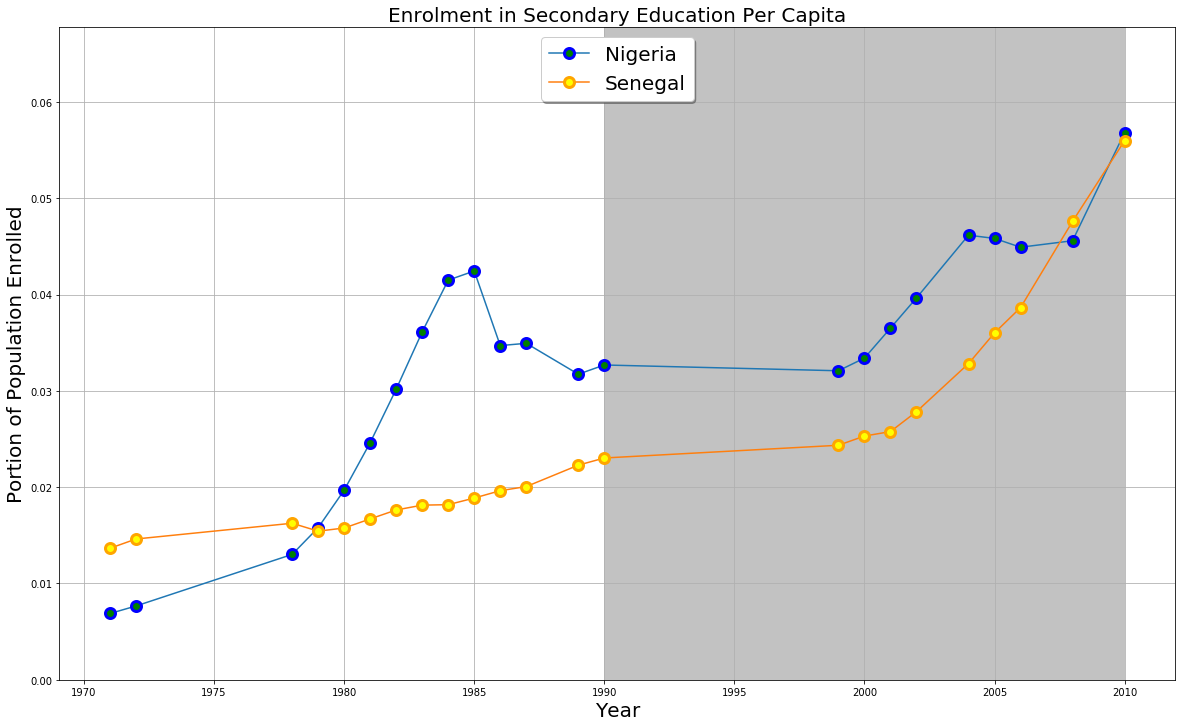

In [278]:
#Linegraph
%matplotlib inline
fig, ax = plt.subplots(figsize = (20, 12))
ax.set_ylim(min(0, ed_SN['IndicatorPerCaptia_x'].min(), ed_SN['IndicatorPerCaptia_y'].min()), \
            1.1 * max(ed_SN['IndicatorPerCaptia_x'].max(), 1.1 * ed_SN['IndicatorPerCaptia_y'].max()))
ax.set_title('Enrolment in Secondary Education Per Capita', fontsize = 20)
ax.plot(ed_SN['Year'], ed_SN['IndicatorPerCaptia_x'], marker='o', markersize=10, 
         markerfacecolor="green", markeredgewidth=3, markeredgecolor="blue")
ax.plot(ed_SN['Year'], ed_SN['IndicatorPerCaptia_y'], marker='o', markersize=10, 
         markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="orange")
ax.grid()
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Portion of Population Enrolled', fontsize = 20)
legend = plt.legend(('Nigeria', 'Senegal'), loc = 'upper center', shadow=True, fontsize = 20)
plt.axvspan(1990, 2010, facecolor='0.7', alpha=0.8)
plt.show()

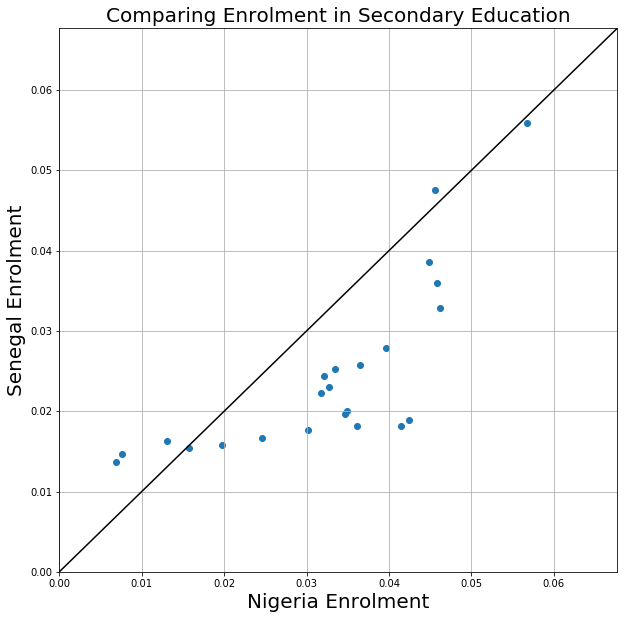

In [281]:
#Note, I didn't feel like this plot deserved to be in the presentation because the data is well displayed in the previous plot

#Scatter Plot
%matplotlib inline
fig, ax = plt.subplots(figsize = (10, 10))

ax.set_ylim(min(0, ed_SN['IndicatorPerCaptia_x'].min(), ed_SN['IndicatorPerCaptia_y'].min()), \
            1.1 * max(ed_SN['IndicatorPerCaptia_x'].max(), 1.1 * ed_SN['IndicatorPerCaptia_y'].max()))
ax.set_xlim(min(0, ed_SN['IndicatorPerCaptia_x'].min(), ed_SN['IndicatorPerCaptia_y'].min()), \
            1.1 * max(ed_SN['IndicatorPerCaptia_x'].max(), 1.1 * ed_SN['IndicatorPerCaptia_y'].max()))
ax.set_title('Comparing Enrolment in Secondary Education',fontsize = 20)
ax.set_xlabel('Nigeria Enrolment', fontsize = 20)
ax.set_ylabel('Senegal Enrolment', fontsize = 20)
ax.grid(True)
ax.scatter(ed_SN['IndicatorPerCaptia_x'], ed_SN['IndicatorPerCaptia_y'])
#Plot line to divide
x = np.linspace(0,.5,100)
y = x
ax.plot(y, x, color = "black")